<a href="https://colab.research.google.com/github/yasarkagant/GitHubTest/blob/master/Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import R2Score

In [2]:
DataFrame = pd.read_csv("train.csv")

In [3]:
DataFrame.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
tensor_data = tf.constant(DataFrame)
print(tensor_data.shape)

(1000, 12)


In [5]:
tensor_data


<tf.Tensor: shape=(1000, 12), dtype=float64, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]])>

In [6]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[5.150000e+02 5.745480e+05 8.089480e+05 7.000000e+00 1.016210e+05
  5.000000e+00 8.000000e+00 1.200000e+01 1.400000e+02 5.700000e+01
  7.100000e+01 2.950130e+05]
 [7.940000e+02 6.815440e+05 8.444720e+05 6.000000e+00 6.613300e+04
  3.000000e+00 5.000000e+00 1.000000e+01 1.520000e+02 1.050000e+02
  1.270000e+02 4.965140e+05]
 [6.770000e+02 5.835370e+05 8.364690e+05 2.000000e+00 1.421950e+05
  2.000000e+00 7.000000e+00 1.500000e+01 1.360000e+02 6.500000e+01
  1.200000e+02 1.498995e+05]
 [2.270000e+02 6.450410e+05 7.524760e+05 7.000000e+00 6.349800e+04
  1.000000e+00 1.000000e+01 1.000000e+01 1.730000e+02 1.080000e+02
  7.200000e+01 4.865900e+05]
 [1.160000e+02 6.843690e+05 8.295570e+05 2.000000e+00 1.318040e+05
  2.000000e+00 4.000000e+00 8.000000e+00 1.440000e+02 5.500000e+01
  7.600000e+01 2.304285e+05]], shape=(5, 12), dtype=float64)


In [7]:
x, y = tensor_data[:,3:-1], tensor_data[:, -1]
print(x.shape, y.shape)

(1000, 8) (1000,)


In [8]:
y = tf.expand_dims(y, axis=1)
print(y.shape)

(1000, 1)


In [9]:
print(y[:5])

tf.Tensor(
[[295013. ]
 [496514. ]
 [149899.5]
 [486590. ]
 [230428.5]], shape=(5, 1), dtype=float64)


In [30]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)

In [31]:
X_train = x[:int(TRAIN_RATIO*DATASET_SIZE)]
y_train = y[:int(TRAIN_RATIO*DATASET_SIZE)]
print(X_train.shape, y_train.shape)

(800, 8) (800, 1)


In [33]:
X_val = x[int(TRAIN_RATIO*DATASET_SIZE):int((TRAIN_RATIO+VAL_RATIO)*DATASET_SIZE)]
y_val = y[int(TRAIN_RATIO*DATASET_SIZE):int((TRAIN_RATIO+VAL_RATIO)*DATASET_SIZE)]

In [35]:
X_test = x[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape, y_test.shape)

(100, 8) (100, 1)


In [36]:
normalizer =  Normalization(axis = -1)
normalizer.adapt(X_train)
normalizer(x)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[ 1.4572232 ,  0.04734987,  1.4633424 , ..., -1.4058901 ,
        -1.3464892 , -1.5380651 ],
       [ 0.87022495, -1.1750927 ,  0.03394804, ..., -0.77913487,
         0.9896234 ,  1.1229882 ],
       [-1.477768  ,  1.4449881 , -0.6807491 , ..., -1.6148084 ,
        -0.95713705,  0.7903566 ],
       ...,
       [ 1.4572232 , -1.3538363 ,  0.7486452 , ..., -0.83136445,
         1.5249826 ,  0.3626873 ],
       [-0.8907698 , -0.61071885,  1.4633424 , ...,  0.00430917,
         0.6489403 ,  1.1705071 ],
       [-0.8907698 , -1.714975  , -0.6807491 , ...,  0.8399828 ,
        -0.81113005, -0.6352077 ]], dtype=float32)>

In [97]:
model  = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(256, activation = "relu"),
    Dense(512, activation="relu"),
    Dense(512, activation= "relu"),
    Dense(512, activation= "relu"),
    Dense(256, activation= "relu"),
    Dense(1,)


])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 256)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 790,802 (3.02 MB)

 Trainable params: 790,785 (3.02 MB)

 Non-trainable params: 17 (72.00 B)

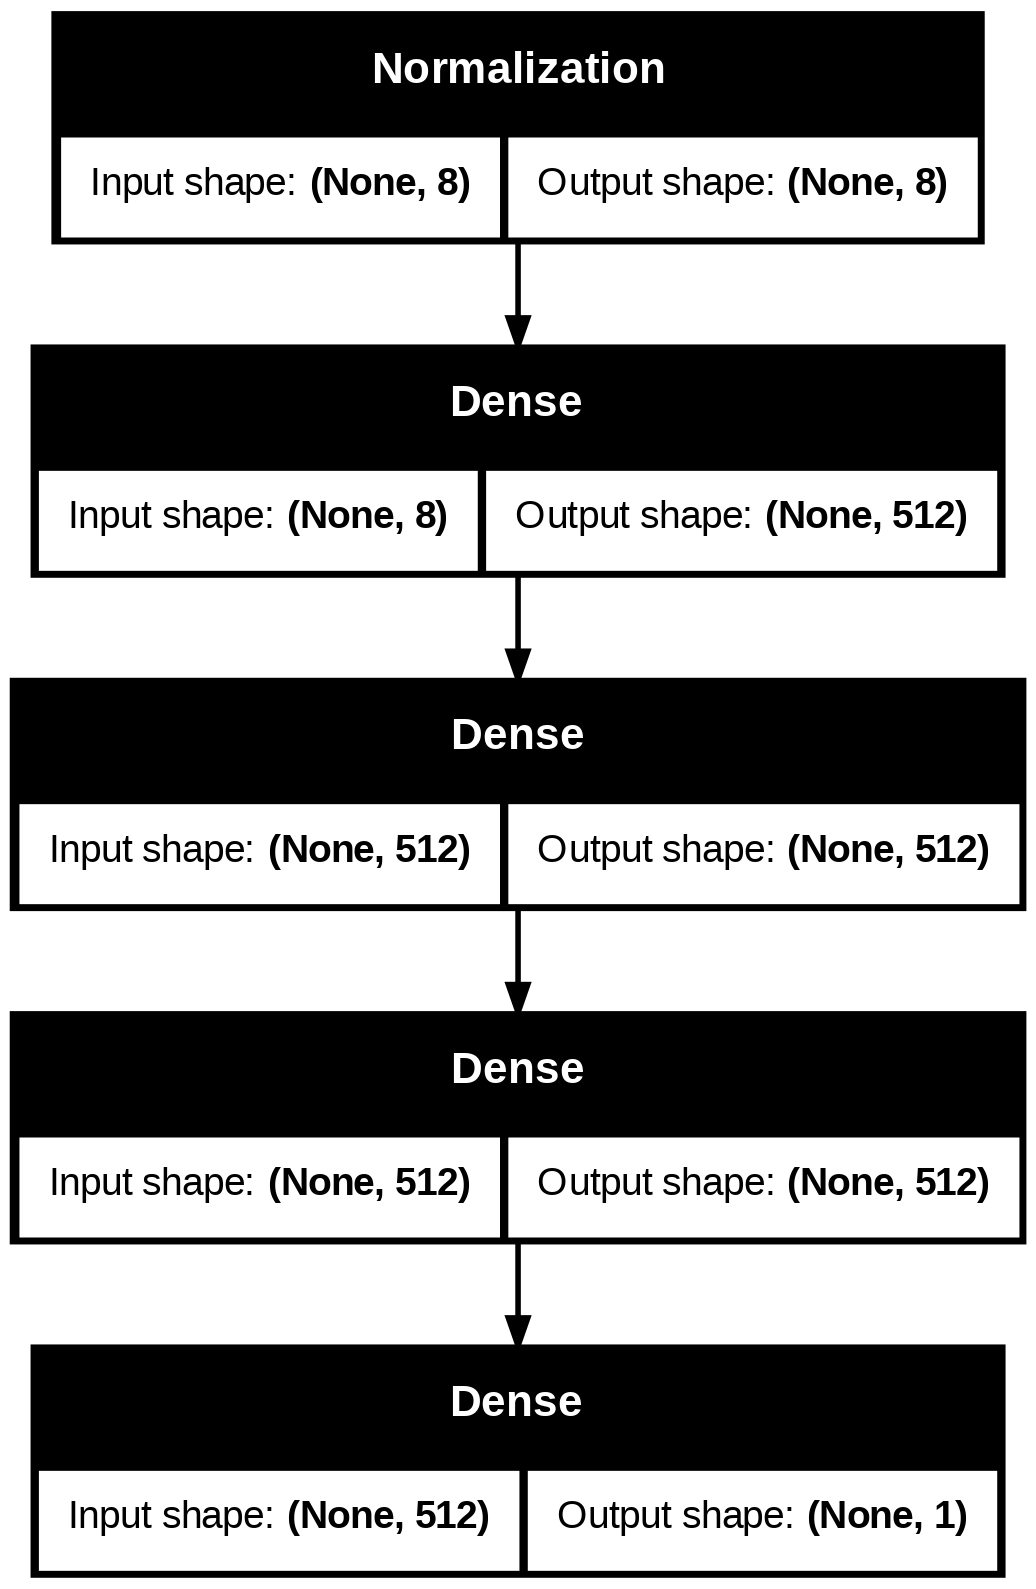

In [65]:
tf.keras.utils.plot_model(model,to_file="model.png", show_shapes=True)

In [98]:
model.compile(loss=MeanAbsoluteError(),
              optimizer=Adam(learning_rate= 0.1),
              metrics = [RootMeanSquaredError(),R2Score()])

In [99]:
history = model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=100, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 250637.7969 - r2_score: -4.3784 - root_mean_squared_error: 291403.8438 - val_loss: 81641.6797 - val_r2_score: 0.4430 - val_root_mean_squared_error: 94640.8516
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 91094.8438 - r2_score: 0.1018 - root_mean_squared_error: 114601.5234 - val_loss: 64208.9453 - val_r2_score: 0.6175 - val_root_mean_squared_error: 78420.8984
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 71227.2891 - r2_score: 0.4559 - root_mean_squared_error: 91029.5703 - val_loss: 106064.4766 - val_r2_score: 0.0585 - val_root_mean_squared_error: 123040.6641
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 97090.8828 - r2_score: 0.1004 - root_mean_squared_error: 118591.1875 - val_loss: 62413.6797 - val_r2_score: 0.6313 - val_root_mean_squared_error: 76992.0938
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 69906.8828 - r2_score: 0.5026 - root_mean_squared_error: 85231.8281 -

In [100]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35766.3828 - r2_score: 0.8923 - root_mean_squared_error: 43977.4805 


[37852.59375, 46259.50390625, 0.8863185048103333]

In [101]:
model.predict(tf.expand_dims(X_test[0], axis= 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


array([[230271.64]], dtype=float32)

In [102]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([295406.5])>